In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_excel('/kaggle/input/ahb-analysisdataset/1730285881-Airbnb_Open_Data (1).xlsx')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [11]:
df.isna().columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [12]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [13]:
df.drop_duplicates()
df.drop(['house_rules', 'license'],axis=1)
df['price']=df['price'].astype(str)
df['service fee']=df['service fee'].astype(str)
df['price']=df['price'].str.replace('$','',regex=False)
df['service fee']=df['service fee'].str.replace('$','',regex=False)

In [14]:
df['price']=df['price'].str.replace(',','',regex=False)
df['service fee']=df['service fee'].str.replace(',','',regex=False)

In [15]:
df.rename(columns={
          
    'price':'price_$',
    'service fee':"service fee_$"
},inplace=True)

In [16]:
df.rename(columns={
          
    'price':'price_$',
    'service fee':"service fee_$"
},inplace=True)

In [17]:
df[['price_$','service fee_$']]

,price_$,service fee_$
0,966.0,193.0
1,142.0,28.0
2,620.0,124.0
3,368.0,74.0
4,204.0,41.0
...,...,...
102594,844.0,169.0
102595,837.0,167.0
102596,988.0,198.0
102597,546.0,109.0


In [18]:
df['price_$']=df['price_$'].astype(float)
df['service fee_$']=df['service fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
# df['Construction year']=df['Construction year'].astype(int)

In [19]:
df['Construction year'].unique()

array([2020., 2007., 2005., 2009., 2013., 2015., 2004., 2008., 2010.,
       2019., 2018., 2006., 2016., 2017., 2021., 2003., 2011., 2012.,
       2022., 2014.,   nan])

In [20]:
df.dropna(subset=['Construction year'])
# df['Construction year']=df['Construction year'].astype(int)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,NaT,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,NaT,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN,NaN


In [21]:
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='brooklyn'

In [22]:
df=df.drop(df[df['availability 365']>500].index)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102598 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102598 non-null  object        
 1   NAME                            102328 non-null  object        
 2   host id                         102598 non-null  object        
 3   host_identity_verified          102309 non-null  object        
 4   host name                       102190 non-null  object        
 5   neighbourhood group             102569 non-null  object        
 6   neighbourhood                   102582 non-null  object        
 7   lat                             102590 non-null  float64       
 8   long                            102590 non-null  float64       
 9   country                         102066 non-null  object        
 10  country code                    102467 non-null  object      

In [24]:
df.drop(['license'],axis=1)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,844.0,169.0,1.0,0.0,NaT,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,837.0,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,988.0,198.0,3.0,0.0,NaT,NaN,5.0,1.0,342.0,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,546.0,109.0,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN


In [25]:
df.duplicated().value_counts()

False    102057
True        541
Name: count, dtype: int64

In [26]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,102590.000000,102590.000000,102493.000000,102384.000000,102351.000000,102325.000000,102189.000000,102415.000000,86705,86719.000000,102272.000000,102279.000000,102150.000000
mean,40.728093,-73.949644,0.497780,2012.487498,625.288058,125.025829,8.135895,27.481746,2019-06-12 03:40:51.221959424,1.374001,3.279089,7.936673,141.098639
min,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.055856,0.049522,0.499998,5.765574,331.668603,66.325139,30.553927,49.505071,NaN,1.746620,1.284652,32.218931,134.983076


In [27]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,53700
Private room,46556
Shared room,2226
Hotel room,116


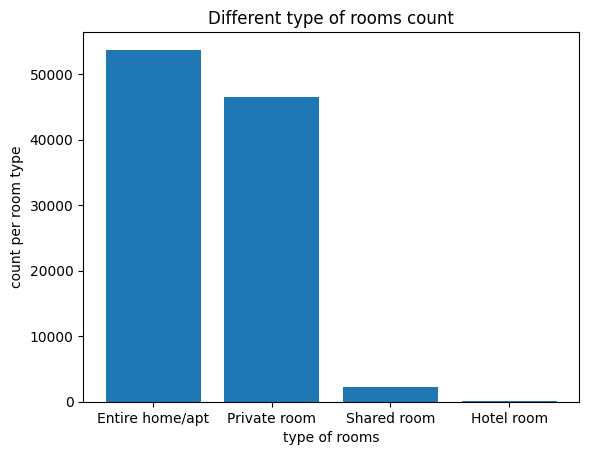

In [28]:
plt.bar(property_types.index,property_types['count'])
plt.title("Different type of rooms count")
plt.xlabel("type of rooms")
plt.ylabel("count per room type")
plt.show()

In [29]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [30]:
neigh_group=df['neighbourhood group'].value_counts().to_frame();neigh_group

,count
neighbourhood group,
Manhattan,43791
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brooklyn,1
manhatan,1


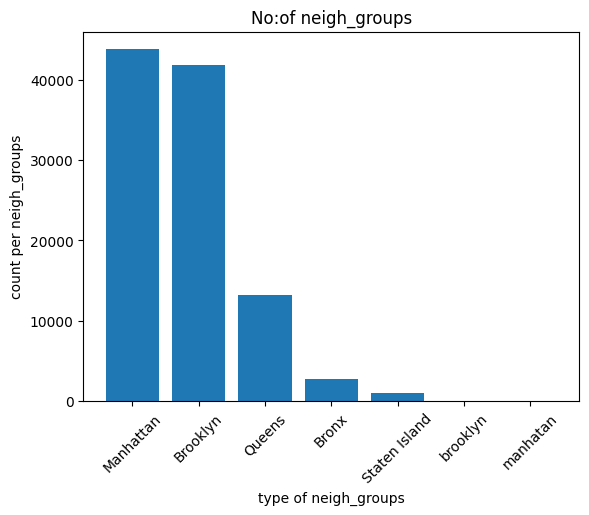

In [31]:
plt.bar(neigh_group.index,neigh_group['count'],)
plt.title("No:of neigh_groups")
plt.xlabel("type of neigh_groups")
plt.ylabel("count per neigh_groups")
plt.xticks(rotation=45)
plt.show()

In [32]:
nei_grp_avg_prices=df.groupby('neighbourhood group')['price_$'].mean().to_frame()
nei_grp_avg_prices

,price_$
neighbourhood group,
Bronx,627.766359
Brooklyn,626.562193
Manhattan,622.427325
Queens,630.207647
Staten Island,624.490546
brooklyn,580.000000
manhatan,460.000000


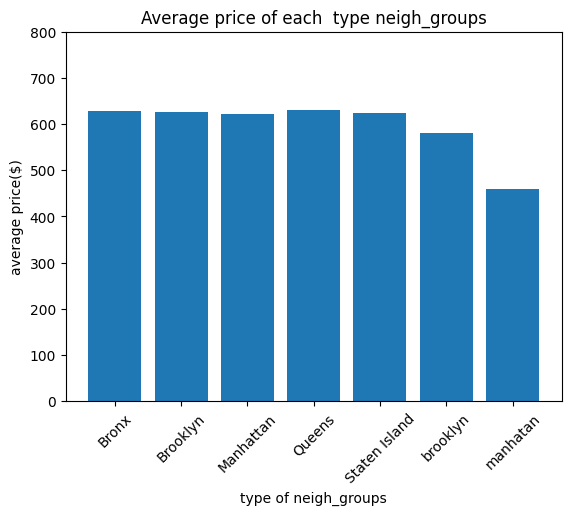

In [33]:
plt.bar(nei_grp_avg_prices.index,nei_grp_avg_prices['price_$'])
plt.title("Average price of each  type neigh_groups")
plt.xlabel("type of neigh_groups")
plt.ylabel("average price($)")
plt.ylim(0,800)
plt.xticks(rotation=45)
plt.show()

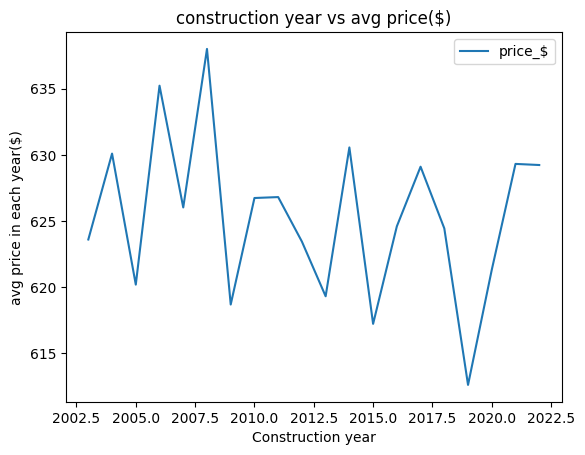

In [34]:
df.groupby(['Construction year'])['price_$'].mean().to_frame().plot()
plt.ylabel("avg price in each year($)")
plt.title("construction year vs avg price($)")
plt.show()

In [35]:
host=df.groupby('host name')["calculated host listings count"].value_counts().sort_values().nlargest(10).to_frame()
host

,,count
host name,calculated host listings count,
Michael,1.0,575
David,1.0,527
Sonder (NYC),327.0,469
Daniel,1.0,368
Alex,1.0,363
Sarah,1.0,344
John,1.0,293
Chris,1.0,279
Blueground,232.0,271


In [36]:
host=host.reset_index()
host

,host name,calculated host listings count,count
0,Michael,1.0,575
1,David,1.0,527
2,Sonder (NYC),327.0,469
3,Daniel,1.0,368
4,Alex,1.0,363
5,Sarah,1.0,344
6,John,1.0,293
7,Chris,1.0,279
8,Blueground,232.0,271
9,Andrew,1.0,271


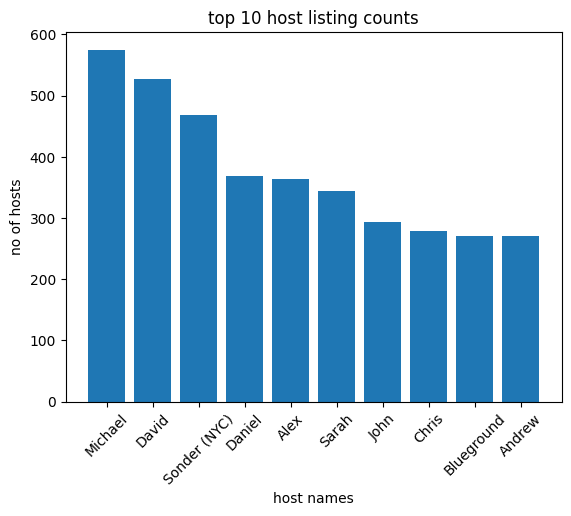

In [37]:
plt.bar(host['host name'],host['count'])
plt.title('top 10 host listing counts')
plt.xlabel("host names")
plt.ylabel("no of hosts")
plt.xticks(rotation=45)
plt.show()

In [38]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()

review

,review rate number
host_identity_verified,
verified,3.286650
unconfirmed,3.271767


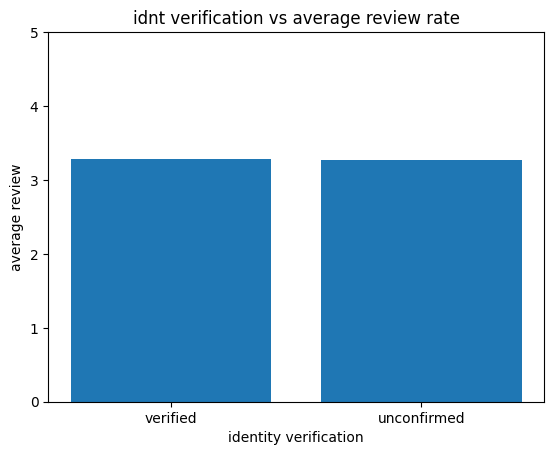

In [39]:
plt.bar(review.index,review['review rate number'])
plt.title("idnt verification vs average review rate")
plt.xlabel("identity verification")
plt.ylim(0,5)
plt.ylabel("average review")
plt.show()

In [40]:
df['price_$'].corr(df['service fee_$'])

0.9999908753467351

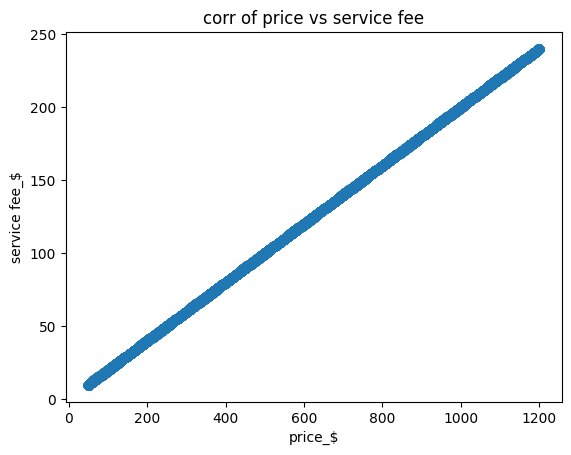

In [41]:
sns.regplot(df,x='price_$',y='service fee_$')
plt.title("corr of price vs service fee")
plt.show()

In [42]:
ABN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()

ABN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.346457
                    Private room               3.329706
                    Shared room                3.264957
Brooklyn            Entire home/apt            3.250378
                    Hotel room                 3.750000
                    Private room               3.264465
                    Shared room                3.336983
Manhattan           Entire home/apt            3.275742
                    Hotel room                 3.500000
                    Private room               3.277576
                    Shared room                3.257459
Queens              Entire home/apt            3.349154
                    Hotel room                 3.750000
                    Private room               3.315585
                    Shared room                3.377778
Staten Island       Entire home/apt            3.329087
                    Private room               3.479482
                    Shared room                3.533333
brooklyn            Private room               4.000000
manhatan            Private room               3.000000

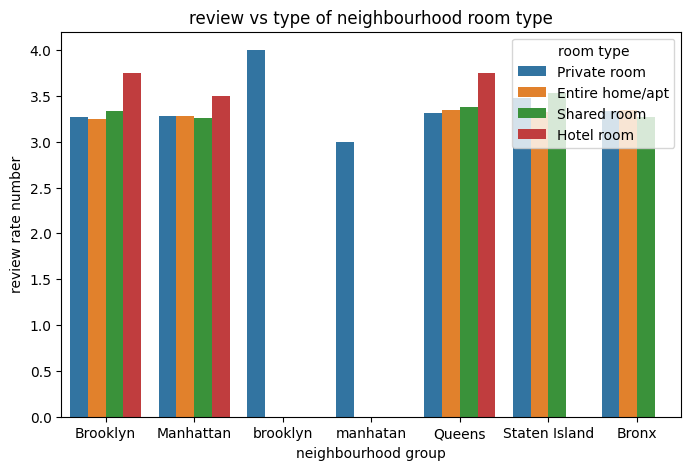

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, 
            x="neighbourhood group", 
            y="review rate number", 
            hue="room type", 
            errorbar=None)
plt.title("review vs type of neighbourhood room type")
plt.show()

In [44]:
df['calculated host listings count'].corr(df['availability 365'])

0.1597854520220473